In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import itertools
np.warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn import model_selection, tree
from sklearn.tree._tree import TREE_LEAF
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as metrics

In [2]:
df = pd.read_csv('ISLR/data/Carseats.csv',index_col=0, parse_dates=True)

In [3]:
r, c = df.shape
print(c)
for a, b in enumerate(df, 1):
    list = "".join('{}. \'{}\''.format(a, b))
    print (list, end=" ")

11
1. 'Sales' 2. 'CompPrice' 3. 'Income' 4. 'Advertising' 5. 'Population' 6. 'Price' 7. 'ShelveLoc' 8. 'Age' 9. 'Education' 10. 'Urban' 11. 'US' 

In [161]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
print(df['ShelveLoc'].value_counts())

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [6]:
print(df['Urban'].value_counts())

Yes    282
No     118
Name: Urban, dtype: int64


In [7]:
print(df['US'].value_counts())

Yes    258
No     142
Name: US, dtype: int64


In [8]:
len(df.index)

400

In [9]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [10]:
df[['Population','Income','Sales','Advertising','Age','Education', 'CompPrice','Price']].corr().round(3)

,Population,Income,Sales,Advertising,Age,Education,CompPrice,Price
Population,1.000,-0.008,0.050,0.266,-0.043,-0.106,-0.095,-0.012
Income,-0.008,1.000,0.152,0.059,-0.005,-0.057,-0.081,-0.057
Sales,0.050,0.152,1.000,0.270,-0.232,-0.052,0.064,-0.445
Advertising,0.266,0.059,0.270,1.000,-0.005,-0.034,-0.024,0.045
Age,-0.043,-0.005,-0.232,-0.005,1.000,0.006,-0.100,-0.102
Education,-0.106,-0.057,-0.052,-0.034,0.006,1.000,0.025,0.012
CompPrice,-0.095,-0.081,0.064,-0.024,-0.100,0.025,1.000,0.585
Price,-0.012,-0.057,-0.445,0.045,-0.102,0.012,0.585,1.000


In [11]:
def calc_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcol = pd.DataFrame(columns=df.columns)
    pval = dfcol.transpose().join(dfcol, how='outer')
    for r in df.columns:
        for c in df.columns:
            pval[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pval

calc_pvalues(df[['Population','Income','Sales','Advertising','Age','Education', 'CompPrice','Price']])

,Population,Income,Sales,Advertising,Age,Education,CompPrice,Price
Population,0,0.8752,0.314,0,0.3948,0.0334,0.0584,0.8087
Income,0.8752,0,0.0023,0.2391,0.9258,0.2566,0.1073,0.2579
Sales,0.314,0.0023,0,0,0,0.2999,0.2009,0
Advertising,0,0.2391,0,0,0.9276,0.5029,0.6294,0.3743
Age,0.3948,0.9258,0,0.9276,0,0.8971,0.0451,0.0411
Education,0.0334,0.2566,0.2999,0.5029,0.8971,0,0.6154,0.8148
CompPrice,0.0584,0.1073,0.2009,0.6294,0.0451,0.6154,0,0
Price,0.8087,0.2579,0,0.3743,0.0411,0.8148,0,0


In [12]:
corr = df[['Population','Income','Sales','Advertising','Age','Education', 'CompPrice','Price']].corr().round(2)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Population,Income,Sales,Advertising,Age,Education,CompPrice,Price
Population,1.00,-0.01,0.05,0.27,-0.04,-0.11,-0.09,-0.01
Income,-0.01,1.00,0.15,0.06,-0.00,-0.06,-0.08,-0.06
Sales,0.05,0.15,1.00,0.27,-0.23,-0.05,0.06,-0.44
Advertising,0.27,0.06,0.27,1.00,-0.00,-0.03,-0.02,0.04
Age,-0.04,-0.00,-0.23,-0.00,1.00,0.01,-0.10,-0.10
Education,-0.11,-0.06,-0.05,-0.03,0.01,1.00,0.03,0.01
CompPrice,-0.09,-0.08,0.06,-0.02,-0.10,0.03,1.00,0.58
Price,-0.01,-0.06,-0.44,0.04,-0.10,0.01,0.58,1.00


[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Sales')]

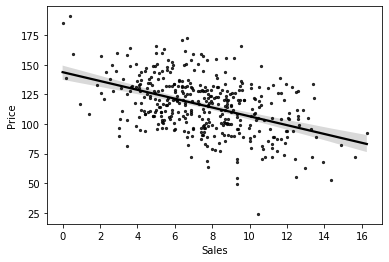

In [13]:
ax = sns.regplot(x = "Sales", y = "Price", data=df, marker='o', color='black', scatter_kws={'s':5})
ax.set(xlabel='Sales', ylabel = 'Price')

<h2>Interpretation</h2>
<h3>Correlation and Scatterplot</h3>

The following predictors have a **positive** correlation and all of their p-values are < 0.05 which supports that they are significantly correlated, thus a relation between them is likely.  
Advertising and Population  
Advertising and Sales    
Price and ComPrice   

The following predictors have a **negative** correlation and all of their p-values are < 0.05 which supports that they are significantly correlated, thus a relation between them is likely.  
Sales and Price  
Sales and Age  
Education and Population

For positive correlation it means that if the competitors price goes up then the price goes up as well. For negative correlation, as seen also on the scatterplot, it means that as the price goes up, then the sales will go down, thus less carseats will be sold.

<h1>1.2.2 Classification Trees</h1>

In [9]:
df['High'] = df.Sales.map(lambda x: 1 if x > 8 else 0)
df.ShelveLoc = pd.factorize(df.ShelveLoc)[0]
df.Urban = df.Urban.map({'No':0, 'Yes':1})
df.US = df.US.map({'No':0, 'Yes':1})

r, c = df.shape
print(c)
for a, b in enumerate(df, 1):
    list = "".join('{}. \'{}\''.format(a, b))
    print (list, end=" ")

12
1. 'Sales' 2. 'CompPrice' 3. 'Income' 4. 'Advertising' 5. 'Population' 6. 'Price' 7. 'ShelveLoc' 8. 'Age' 9. 'Education' 10. 'Urban' 11. 'US' 12. 'High' 

In [10]:
X = df.drop(['Sales', 'High'], axis = 1)
y = df.High

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 0)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [124]:
export_graphviz(model,
                out_file="carseat_tree_five.dot",
                feature_names=X_train.columns,
                rounded=True,
                filled=True)

In [56]:
Image(url= "https://imgur.com/zIw8801.jpg")

<h2>Interpretation</h2>

Root node:  
Price <= 94.5 means that all nodes where the feature Price is lower than 94.5 go to the left child and samples where the feature is higher than 94.5 go to the right child.  
gini = 0.484 is the gini impurity of the node, which describes how much the classes are mixed up.  
samples = 200 means that the node has 200 samples, and since it is the root it also means that the tree was trained on the 200 samples.  
value = \[118, 82\] are class probabilities, where here 118 samples belong to class A and 82 to class B.  

Leaf nodes:  
These nodes are not further split, so there is no need for a Price <= something field.    
gini = 0.349/0.434 are the remaining impurities in the child nodes. They are lower than in the parent node, which means the split improved separability between the classes, but there is still some uncertainty left.  
samples = 40/160 sum to 200. 40 samples went to the left child and 160 samples to the right child.  
values = \[9, 31\]/\[109, 51\] are the class probabilities in the children. Most samples in the left child belong to class B (31 vs 9) and most samples in the right child belong to class A (109 v 51).

Worth mentioning is also that since Price is the root node, it seems that Price is the most important indicator of High sales.

In [62]:
# Training error
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [63]:
# Testing error
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       118
           1       0.69      0.54      0.60        82

    accuracy                           0.71       200
   macro avg       0.70      0.68      0.69       200
weighted avg       0.71      0.71      0.70       200



In [64]:
pred = model.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test, pred).T, index = ['No', 'Yes'], columns = ['No', 'Yes']))
print('\n Model Score:',model.score(X_train, y_train))
print('\n Accuracy Score:',accuracy_score(y_test, pred))

     No  Yes
No   98   38
Yes  20   44

 Model Score: 1.0

 Accuracy Score: 0.71


<h2>Interpretation</h2>

The true positive rate (recall) is 100% in the training data and 71\% in the testing data.  
The f1-score is a measure of the test's accuracy. It considers precision and recall to compute the score, so it is the harmonic mean of the precision and recall.  
We are interested in the testing data, and so the confusion matrix shows that we are making correct predictions for around 71\% (98+44)/200 = 0.71  of the test data set.

<h1>1.2.3 Pruning, in this case: </h1>
<h2>max_depth</h2>

In [96]:
#print(cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=10).mean())
#print(cross_val_score(DecisionTreeClassifier(max_features='auto'), X, y, scoring='accuracy', cv=10).mean())

crossvalidation = KFold(n_splits=X.shape[0], shuffle=True, random_state=1)

for depth in range(1,10):
    tree_classifier = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
    if tree_classifier.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_classifier, X, y, scoring='accuracy', cv=crossvalidation))
    print("Depth: %i Accuracy: %.3f" % (depth,score))

Depth: 1 Accuracy: 0.675
Depth: 2 Accuracy: 0.690
Depth: 3 Accuracy: 0.730
Depth: 4 Accuracy: 0.765
Depth: 5 Accuracy: 0.795
Depth: 6 Accuracy: 0.805
Depth: 7 Accuracy: 0.745
Depth: 8 Accuracy: 0.752
Depth: 9 Accuracy: 0.735


<h2>Interpretation</h2>

The "pruning" with python is a bit different than with R and so a loop was created to find the best depth for the tree.  
Since X contains predictors and y holds cassifications a cross-validation was defined to check the results using decision trees. The loop iterates over the different depths and prints the accuracy score at each depth. After the 6th depth the performance starts to decrease due to overfitting. The best solution in this case is a tree with 6 splits. In the following we will see how this tree performs.

In [99]:
model2 = DecisionTreeClassifier(max_depth = 6)
model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [100]:
pred = model2.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test, pred).T, index = ['No', 'Yes'], columns = ['No', 'Yes']))
print('\n Model Score:',model2.score(X_train, y_train))
print('\n Accuracy Score:',accuracy_score(y_test, pred))

      No  Yes
No   100   32
Yes   18   50

 Model Score: 0.955

 Accuracy Score: 0.75


In [101]:
export_graphviz(model2,
                out_file="carseat_tree_prune.dot",
                feature_names=X_train.columns,
                rounded=True,
                filled=True)

In [152]:
Image(url= "https://imgur.com/uaX2XiI.jpg")

In [89]:
model3 = DecisionTreeClassifier(max_depth = 11)
model3.fit(X_train, y_train)
pred = model3.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test, pred).T, index = ['No', 'Yes'], columns = ['No', 'Yes']))
print('\n Model Score:',model3.score(X_train, y_train))
print('\n Accuracy Score:',accuracy_score(y_test, pred))

     No  Yes
No   93   37
Yes  25   45

 Model Score: 1.0

 Accuracy Score: 0.69


In [90]:
export_graphviz(model3,
                out_file="carseat_tree_11.dot",
                feature_names=X_train.columns,
                rounded=True,
                filled=True)

In [102]:
Image(url= "https://imgur.com/IvBk1Nm.jpg")

<h2>Interpretation</h2>

After specifying the max_depth = 6, according to the crossvalidation results, the confusion matrix shows that we are making correct predictions for around 75\% (100+50)/200 = 0.75 of the test data set. - Thus 75\% of the test observations are correctly classified.  
In the second experiment the max_depth is increased to 11 (assuming the accuracy tests for each depth weren't printed before, where these results are visible too) it is visible that the higher max_depth lowers the classification accuracy to 69\%. - Thus the larger pruned tree has lower classification accuracy.    
Thus, after specifying the max_depth to 6 and pruning the tree this way the accuracy has improved best.

<h1>Pruning, in this case: </h1>
<h2>Post pruning</h2>

In [68]:
def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # unlinking children by turning a node into a leaf
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are children, visit them
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

print(sum(model.tree_.children_left < 0))
# begin pruning from root
prune_index(model.tree_, 0, 5)
sum(model.tree_.children_left < 0)

38


49

In [69]:
export_graphviz(model,
                out_file="carseat_tree_prune2.dot",
                feature_names=X_train.columns,
                rounded=True,
                filled=True)

In [70]:
pred = model.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test, pred).T, index = ['No', 'Yes'], columns = ['No', 'Yes']))
print('\n Model Score:',model.score(X_train, y_train))
print('\n Accuracy Score:',accuracy_score(y_test, pred))

     No  Yes
No   95   34
Yes  23   48

 Model Score: 0.855

 Accuracy Score: 0.715


In [131]:
Image(url= "https://imgur.com/w3GBMuw.jpg")

<h1>Interpretation</h1>

An attempt at post-pruning the tree: This is accomplished by traversing the tree and remove all children of the nodes with minimum class count less that 5 in this case.  
The printed numbers 38 and 49 mean that the code has created 11 new leaf nodes (by practically removing links to their ancestors).  
The confusion matrix shows that we are making correct predictions for around 71.5% (95+48)/200 = 0.715 of the test data set.  
Thus, after pruning the accuracy has slightly improved compared to the model without specified max_depth. However it performed worse than the model which was "pruned" by specifying the max_depth = 6.  
Out of all classification trees, the one with the specified max_depth of 6 has the highest accuracy score (75\%), thus providing correct predictions for around 75\%

<h1>1.2.4 Regression Trees</h1>

In [5]:
df_bstn = pd.read_csv('ISLR/data/Boston.csv',index_col=0, parse_dates=True)

In [6]:
X = df_bstn.drop('medv', axis = 1)
y = df_bstn.medv

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
model_reg = DecisionTreeRegressor(max_depth=3)
model_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [68]:
export_graphviz(model_reg,
            out_file="boston_tree_five.dot",
            feature_names=X_train.columns,
            rounded=True,
            filled=True)

In [64]:
Image(url= "https://imgur.com/2YK1JO5.jpg")

<h1>Interpretation</h1>

As seen already multiple times in the previous assignments, lstat measures the percentage of people with a low socioeconomic status. The tree's root indicates that lower values of lstat correspond to higher prices in housing. We can see that the set was split into lstat <= 8.13 where lower lstat goes to the left and higher lstat to the right. 

In [71]:
crossvalidation = KFold(n_splits=X.shape[0], shuffle=True, random_state=1)

for depth in range(1,10):
    tree_reg = tree.DecisionTreeRegressor(max_depth=depth)
    if tree_reg.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_reg, X, y, scoring='neg_mean_squared_error', cv=crossvalidation))
    print("Depth: %i MSE: %.3f" % (depth,abs(score)))

Depth: 1 MSE: 50.939
Depth: 2 MSE: 28.783
Depth: 3 MSE: 23.242
Depth: 4 MSE: 21.359
Depth: 5 MSE: 20.955
Depth: 6 MSE: 16.620
Depth: 7 MSE: 18.315
Depth: 8 MSE: 18.605
Depth: 9 MSE: 19.220


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
model_reg = DecisionTreeRegressor(max_depth=2)
model_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [76]:
export_graphviz(model_reg,
            out_file="bstn_tree.dot",
            feature_names=X_train.columns,
            rounded=True,
            filled=True)

In [77]:
Image(url= "https://imgur.com/bHUgDxp.jpg")

<h1>Interpretation</h1>

Since I didn't manage to plot the size against the error, I decided to run again the loop to to look at the output at each depth up until 9. This time the depth 2 was choosen since it gives the most similar result as the teacher has in his R example.  
Tree: The rrot node is lstat with a threshold of 8.13 with 404 samples. We split the samples into 139 to the left and 265 to the right children node. the left child node uses the variable rm (number of rooms) with a threshold of 7.437 and right node uuses lstat with a threshold of 15.0.

In [75]:
prediction = model_reg.predict(X_test)

mse = mean_squared_error(y_test, prediction)
mae = metrics.mean_absolute_error(y_test, prediction)
rss = np.mean((prediction - y_test) ** 2)
r2 = r2_score(y_test, prediction)
print('Mean squared error: %.2f' % mse)
print('Mean absolute error: %.2f' % mae)
print('Residual sum of squares: %.2f' % rss)
print('R2: %.2f' % r2)

Mean squared error: 35.41
Mean absolute error: 3.91
Residual sum of squares: 35.41
R2: 0.57


35.406215828790266

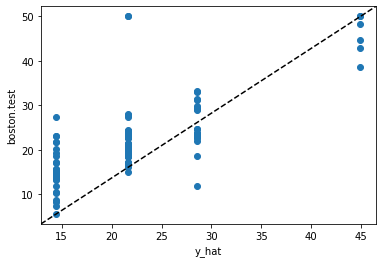

In [78]:
plt.scatter(prediction, y_test, label = 'medv')

plt.plot([0, 1], [0, 1], '--k', transform = plt.gca().transAxes)

plt.xlabel('y_hat')
plt.ylabel('boston.test')

mean_squared_error(y_test, prediction)

<h1>Interpretation</h1>

The test set mean squared error associated with the regression tree here is 35.4. We can now calculate the square root of the mean squared error, which results in around 5.37. This suggests that this model results in test predictions that are within around 5,370 $ of the true median home value for suburbs.

<h1>1.2.5 Regression Bagging (Trees) and Random Forests</h1>

In [211]:
# using all features = bagging
random_forest1 = RandomForestRegressor(max_features = 13, random_state = 1)
random_forest1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=13, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

16.267629007905143

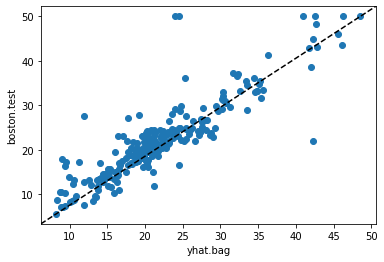

In [213]:
prediction = random_forest1.predict(X_test)

plt.scatter(prediction, y_test, label = 'medv')
plt.plot([0, 1], [0, 1], '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('yhat.bag')
plt.ylabel('boston.test')

mean_squared_error(y_test, prediction)

<h2>Change number of trees</h2>

In [214]:
random_forest2 = RandomForestRegressor(max_features = 13, n_estimators = 25, random_state = 1)

random_forest2.fit(X_train, y_train)

prediction = random_forest2.predict(X_test)
mean_squared_error(y_test, prediction)

17.376042687747038

<h2>Interpretation</h2>

Adding 25 decision trees results in a higher mean squared error, thus makes it a less suitable model.

In [215]:
random_forest3 = RandomForestRegressor(max_features = 6, random_state = 1)

random_forest3.fit(X_train, y_train)

prediction = random_forest3.predict(X_test)
mean_squared_error(y_test, prediction)

15.115262782608696

15.115262782608696

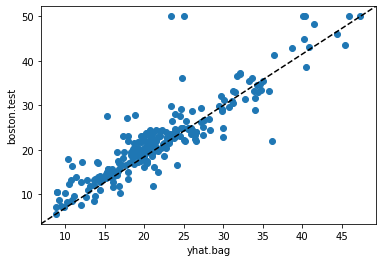

In [216]:
prediction = random_forest3.predict(X_test)

plt.scatter(prediction, y_test, label = 'medv')

plt.plot([0, 1], [0, 1], '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('yhat.bag')
plt.ylabel('boston.test')

mean_squared_error(y_test, prediction)

<h2>Interpretation</h2>

Growing a random forest with not all 13 features, but limiting it to 6 shows an improvement over the bagging here, since the MSE is lower. 

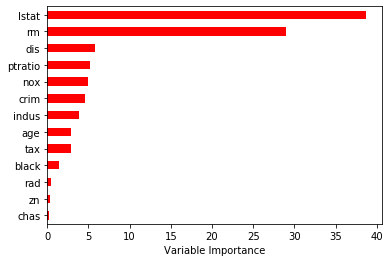

In [155]:
Importance = pd.DataFrame({'Importance':random_forest2.feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

<h2>Interpretation</h2>

By looking at the graph it is visible that lstat and rm are most important out of all features.

<h1>1.2.6 Regression Boosting (Trees)</h1>

In [164]:
regr_boost = GradientBoostingRegressor(n_estimators = 500, 
                                       learning_rate = 0.01, 
                                       max_depth = 4, 
                                       random_state = 1)

regr_boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

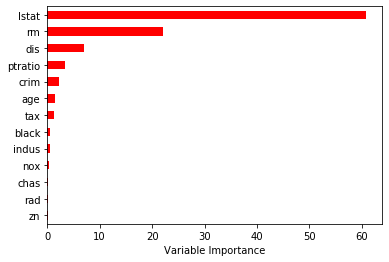

In [165]:
feature_importance = regr_boost.feature_importances_*100

rel_imp = pd.Series(feature_importance, 
                    index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', color = 'r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

<h2>Interpretation</h2>

By limiting n_estimators = 500 which mean that we want 500 trees, and the option max_depth = 4 limits the depth of each tree. The results show again that the wealth of the community (lstat) and the number of rooms are two most important features. However, the rm is a bit lower compared to the previous graph.

In [166]:
mean_squared_error(y_test, regr_boost.predict(X_test))

17.447987096423084

In [168]:
regr_boost2 = GradientBoostingRegressor(n_estimators = 500, 
                                        learning_rate = 0.2, 
                                        max_depth = 4, 
                                        random_state = 1)
regr_boost2.fit(X_train, y_train)
mean_squared_error(y_test, regr_boost2.predict(X_test))

17.298842519253792

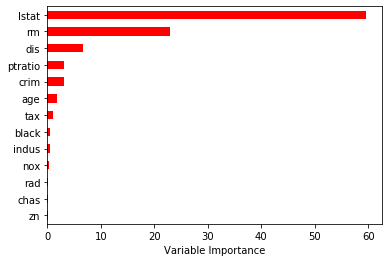

In [169]:
feature_importance = regr_boost2.feature_importances_*100

rel_imp = pd.Series(feature_importance, 
                    index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', color = 'r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

17.298842519253792

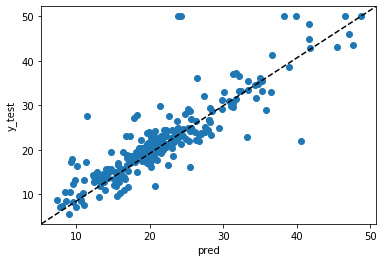

In [170]:
pred = regr_boost2.predict(X_test)

plt.scatter(pred, y_test, label = 'medv')

plt.plot([0, 1], [0, 1], '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

<h2>Interpretation</h2>

The parameters are almost the same, only this time the learning_rate = 0.2. For the first model with the learning_rate 0.001 the MSE is 17.45 and for the second model the MSE is 17.3, thus the error rate is the sqrt(17.3) which is 4.16, and this model performs again slightly better than the previous one.  
Out of all regression trees performed, the growing a random forest with not all 13 features, but limiting it to 6 shows the lowest MSE with 15.12. Boosting in this case shows higher MSE than random forests.